<a href="https://colab.research.google.com/github/sajalf49/DS-AI_Assignments/blob/main/week7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7: Model Evaluation
### Project: Credit Card Fraud Detection

In this week, I focused on evaluating my classification models.
I applied:
- Confusion Matrix
- Precision, Recall, and F1-score
- ROC Curve & AUC

Finally, I reflected on which metric is the most important for my project.

In [1]:
# Import libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset (same as previous weeks)
csv_name = "creditcard_cleaned.csv"
if os.path.exists(csv_name):
    df = pd.read_csv(csv_name)
    print(f"Loaded '{csv_name}' successfully! Shape: {df.shape}")
else:
    # Fallback small dataset
    data = {
        'TransactionID': list(range(1, 21)),
        'Amount': [100.5, 250.75, 300.0, 5000.0, 60.0, 150.0, 80.0, 120.0, 250.75, 45.0,
                   999.0, 30.0, 20.0, 750.0, 200.0, 130.0, 400.0, 85.0, 60.0, 25.0],
        'Age': [25, 35, 40, 28, 33, 30, 45, 38, 35, 29, 50, 22, 41, 31, 27, 34, 36, 39, 32, 26],
        'Fraudulent': [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0]
    }
    df = pd.DataFrame(data)
    df.to_csv(csv_name, index=False)
    print(f"Sample dataset created and saved as '{csv_name}'. Shape: {df.shape}")

df.head()

Sample dataset created and saved as 'creditcard_cleaned.csv'. Shape: (20, 4)


,TransactionID,Amount,Age,Fraudulent
0,1,100.50,25,0
1,2,250.75,35,0
2,3,300.00,40,0
3,4,5000.00,28,1
4,5,60.00,33,0


## Step 1: Split Data

In [3]:
X = df[['Age', 'Amount']]
y = df['Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (14, 2) Test shape: (6, 2)


## Step 2: Train Models (Logistic Regression & Random Forest)

In [4]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:,1]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

## Step 3: Confusion Matrices

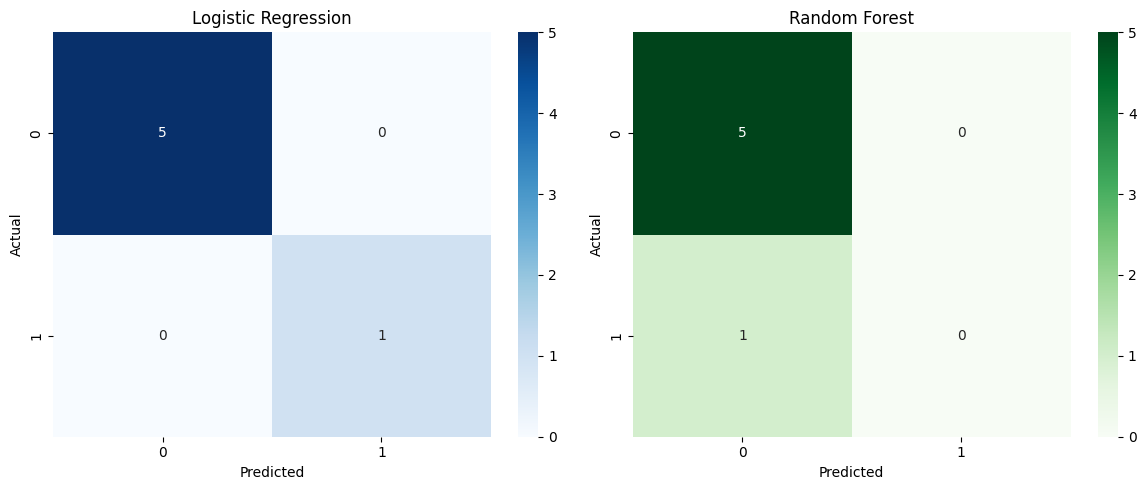

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

## Step 4: Precision, Recall, and F1-score

In [6]:
print("Logistic Regression Metrics")
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

print("\nRandom Forest Metrics")
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Logistic Regression Metrics
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Random Forest Metrics
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 5: ROC Curve & AUC

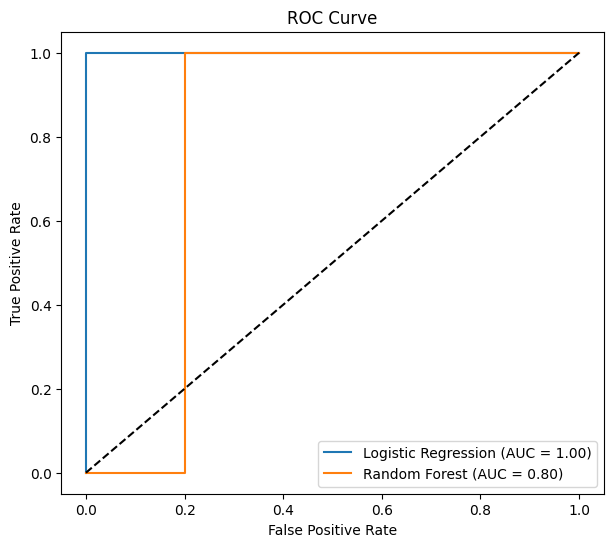

In [7]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Reflection
For my fraud detection project, **Recall** is the most important metric.

- Fraudulent transactions are rare but dangerous.
- If the model misses them (false negatives), fraud will go undetected.
- Precision is also useful, but Recall ensures I catch as many fraud cases as possible.

✅ **Project Milestone:** I decided that **Recall** will be the key evaluation metric for my project.